In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [123]:
def time_label(path):
    df = pd.read_csv(path)
    #df.head()
    plt.figure(figsize=(20,6))
    plt.xticks(rotation=90)
    plt.scatter(df['time'], df['label'])

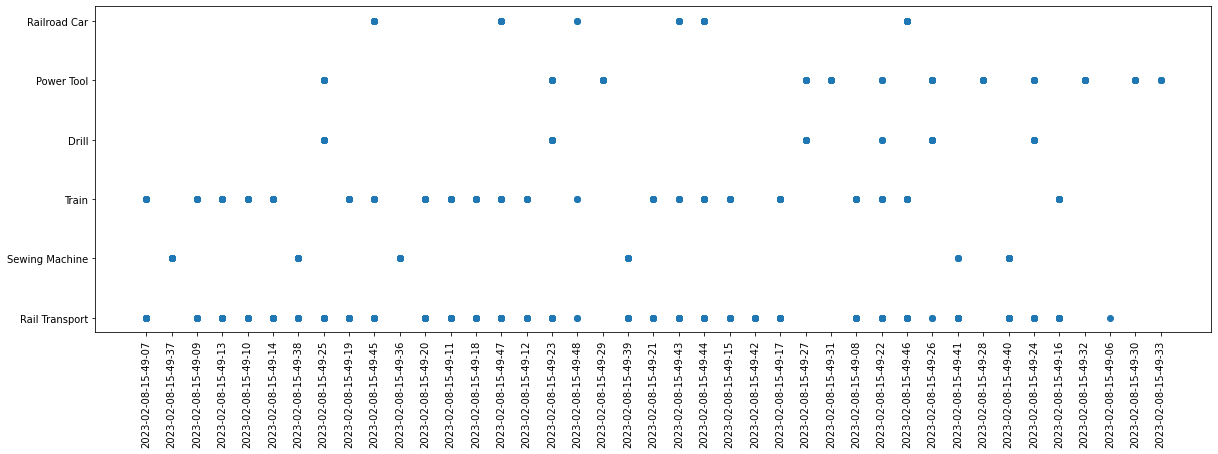

In [132]:
path = "../../data/firestore/Feb8-1_audio_labels.csv"

time_label(path)

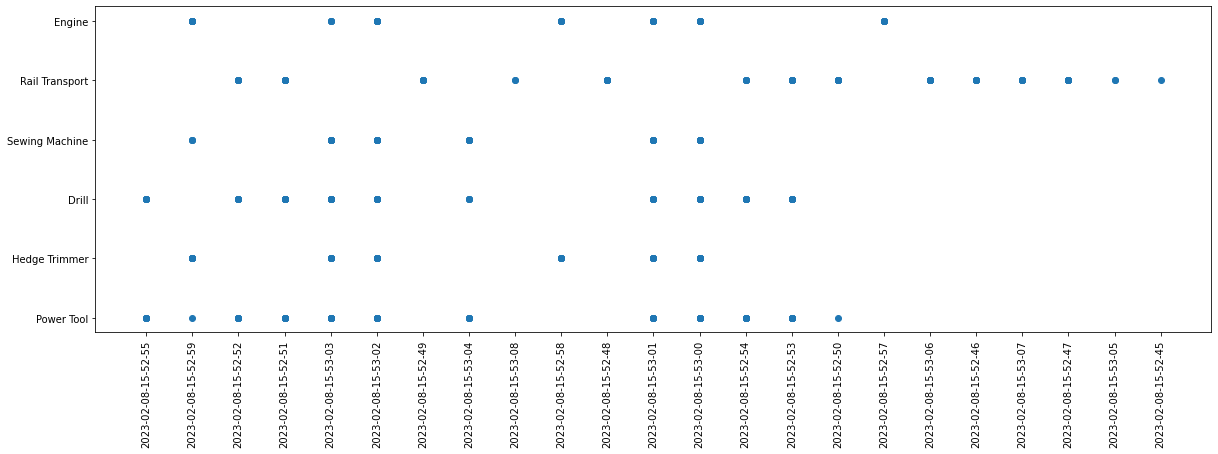

In [125]:
path = "../../data/firestore/Feb8-2_audio_labels.csv"
time_label(path)

In [126]:
from functools import reduce

In [127]:
file_paths = [f for f in glob.glob('../../data/pm_data/*.edf')]
data_frames = []

for _file in file_paths:
    print(_file)
    pm_df = pd.read_csv(_file, sep="	", parse_dates=[1])
    data_frames.append(pm_df)

combined_df = reduce(lambda left,right: pd.merge(left,right,on='Local_Date_Time'), data_frames)
combined_df

../../data/pm_data/2023-02-08_15-45-44-SPS3x_1837FE6A6AD70C29.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_124BF175470BC117.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_BC5F2E8BD0E9B21D.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_033EBECC09FAA564.edf
../../data/pm_data/2023-02-08_15-45-44-SPS3x_DA8590A0DD5EC12B.edf


,Epoch_UTC_x,Local_Date_Time,MassConc_1p0_SPS3x_1837FE6A6AD70C29,MassConc_2p5_SPS3x_1837FE6A6AD70C29,MassConc_4p0_SPS3x_1837FE6A6AD70C29,MassConc_10p_SPS3x_1837FE6A6AD70C29,NumbConc_0p5_SPS3x_1837FE6A6AD70C29,NumbConc_1p0_SPS3x_1837FE6A6AD70C29,NumbConc_2p5_SPS3x_1837FE6A6AD70C29,NumbConc_4p0_SPS3x_1837FE6A6AD70C29,...,MassConc_1p0_SPS3x_DA8590A0DD5EC12B,MassConc_2p5_SPS3x_DA8590A0DD5EC12B,MassConc_4p0_SPS3x_DA8590A0DD5EC12B,MassConc_10p_SPS3x_DA8590A0DD5EC12B,NumbConc_0p5_SPS3x_DA8590A0DD5EC12B,NumbConc_1p0_SPS3x_DA8590A0DD5EC12B,NumbConc_2p5_SPS3x_DA8590A0DD5EC12B,NumbConc_4p0_SPS3x_DA8590A0DD5EC12B,NumbConc_10p_SPS3x_DA8590A0DD5EC12B,TypPartSize_SPS3x_DA8590A0DD5EC12B
0,1.675900e+09,2023-02-08 15:45:55.800000-08:00,0.670568,0.977274,1.197247,1.310012,3.882449,4.987766,5.297547,5.363079,...,0.644255,0.975751,1.217298,1.341124,3.635224,4.751926,5.082229,5.150391,5.161700,0.653522
1,1.675900e+09,2023-02-08 15:45:57.800000-08:00,0.661390,0.963897,1.180859,1.292081,3.829306,4.919494,5.225035,5.289670,...,0.636202,0.954286,1.185210,1.303591,3.615883,4.704360,5.020578,5.085794,5.096631,0.638585
2,1.675900e+09,2023-02-08 15:45:58.800000-08:00,0.648454,0.945045,1.157763,1.266810,3.754411,4.823276,5.122841,5.186212,...,0.647094,0.918483,1.110593,1.209076,3.824569,4.851426,5.117058,5.171613,5.180774,0.629429
3,1.675900e+09,2023-02-08 15:45:59.800000-08:00,0.637958,0.921958,1.124843,1.228849,3.715764,4.755345,5.041496,5.101988,...,0.652625,0.926334,1.120086,1.219411,3.857261,4.892894,5.160799,5.215819,5.225058,0.629429
4,1.675900e+09,2023-02-08 15:46:00.800000-08:00,0.636575,0.902843,1.091249,1.187832,3.756308,4.767307,5.034022,5.090309,...,0.650579,0.923430,1.116575,1.215588,3.845169,4.877555,5.144619,5.199468,5.208678,0.629429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.675902e+09,2023-02-08 16:23:35.500000-08:00,1.444873,1.997041,2.381862,2.579134,8.674136,10.888567,11.436565,11.551900,...,153.717422,202.532333,235.327927,252.140289,952.596680,1172.432129,1218.720947,1228.144165,1229.761475,0.738478
501,1.675902e+09,2023-02-08 16:23:55.600000-08:00,117.814720,157.688293,184.842041,198.761932,721.912231,894.554077,933.576111,941.754700,...,47.326561,60.217438,68.560608,72.837700,299.305328,363.697052,375.651917,378.070099,378.491730,0.742566
502,1.675902e+09,2023-02-08 16:24:12.700000-08:00,56.972202,78.906586,94.213226,102.059914,341.566376,429.131958,450.917999,455.504272,...,65.003868,84.217461,96.913719,103.422348,406.856598,497.620514,515.660095,519.322144,519.955017,0.785917
503,1.675902e+09,2023-02-08 16:25:56.200000-08:00,10.311160,17.885468,23.612381,26.548180,51.583496,72.976395,80.881859,82.569763,...,11.527165,18.167318,23.070650,25.584282,63.046555,84.118095,90.789368,92.169090,92.396736,0.890981


In [130]:
# plt.figure(figsize=(20,6))
# plt.xticks(rotation=90)
# plt.plot(combined_df['Local_Date_Time'], combined_df['MassConc_2p5_SPS3x_1837FE6A6AD70C29'])

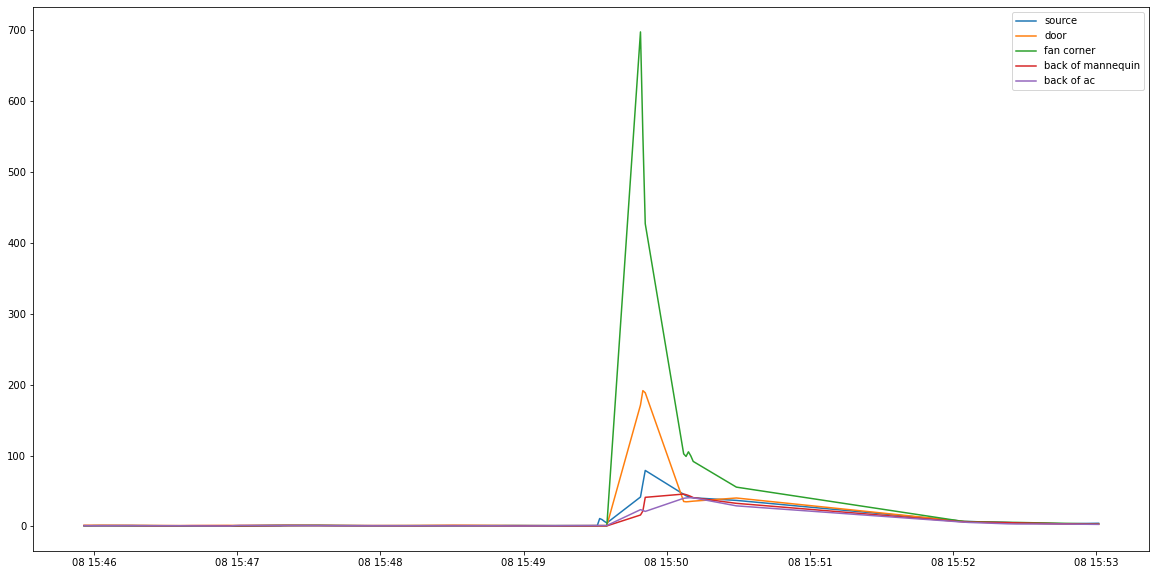

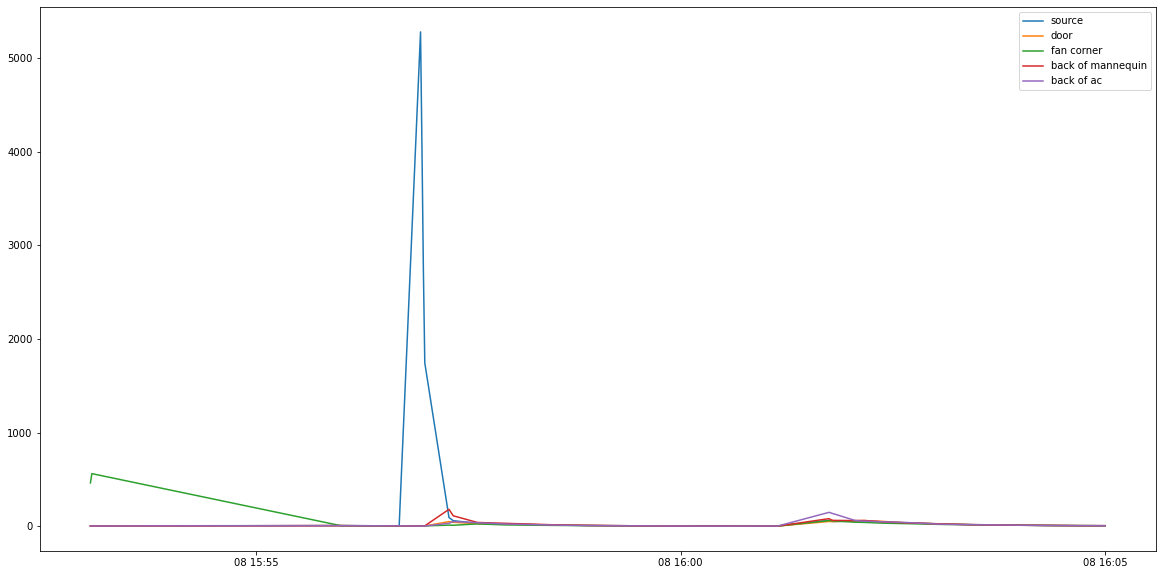

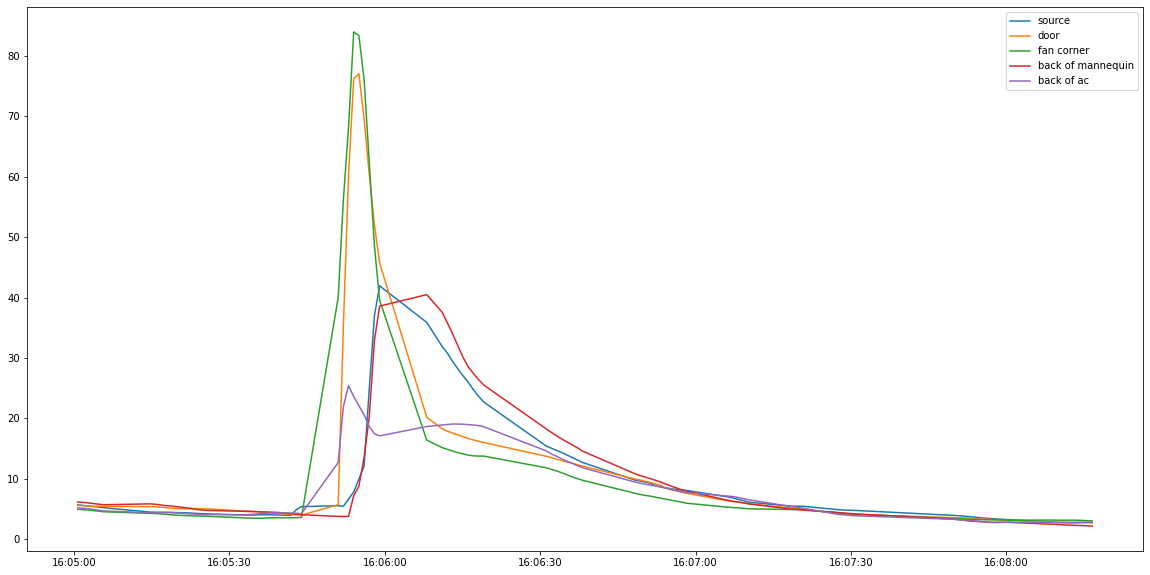

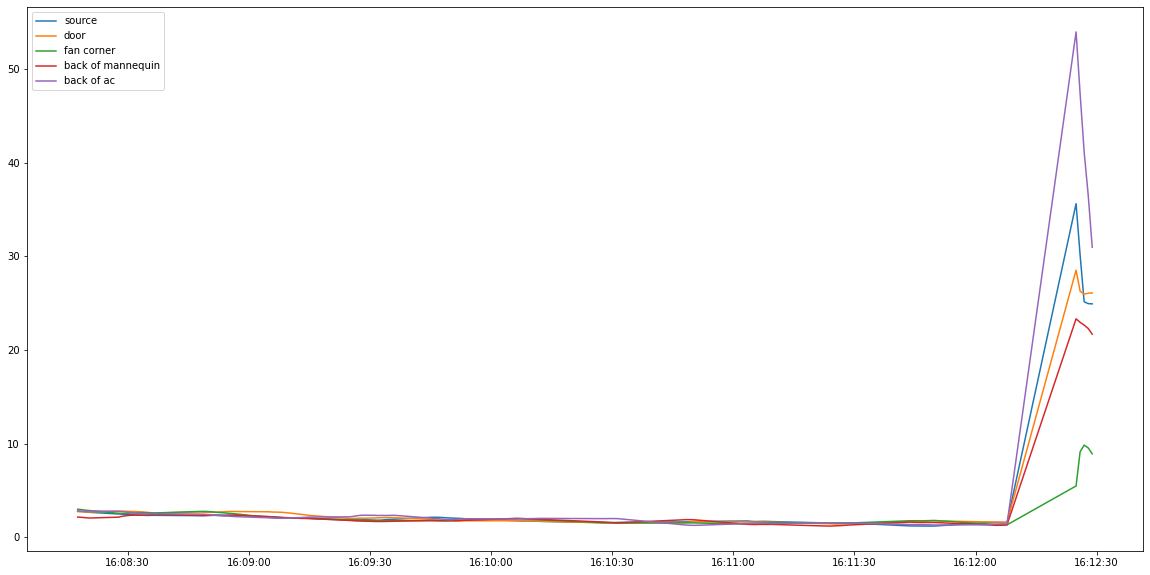

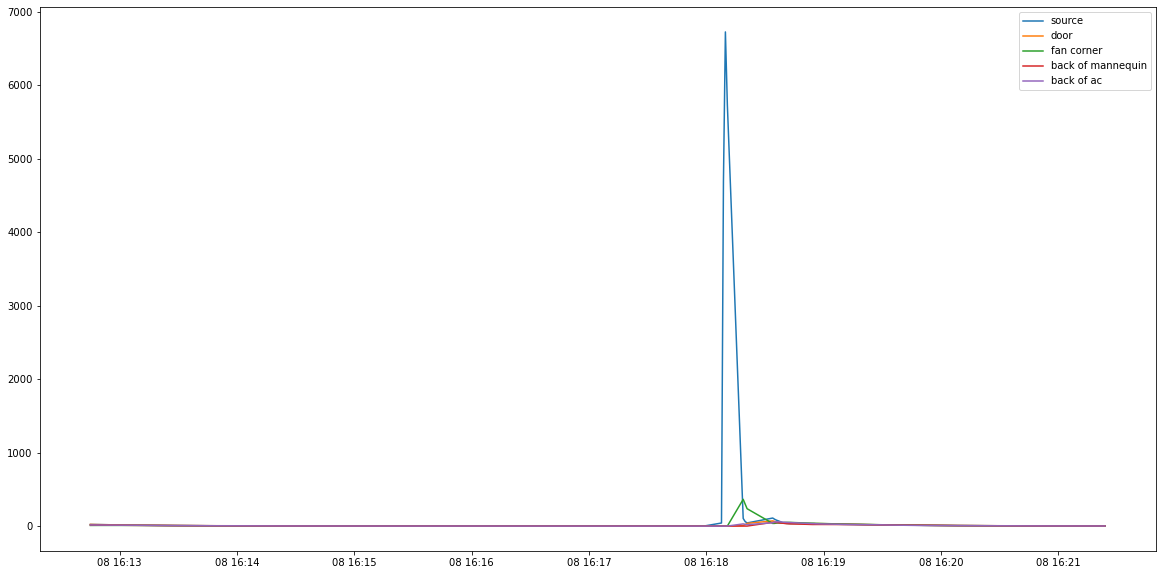

In [129]:
#2.5
place_mapping = {'137f63':'door', '680415': 'fan corner', '6f7f19':'back of ac',
                    '110e60':'back of mannequin', '620512': 'source'}
sensor_mapping = {'BC5F2E8BD0E9B21D':'680415', 'DA8590A0DD5EC12B':'6f7f19', 
                    '1837FE6A6AD70C29':'620512', '124BF175470BC117':'137f63', '033EBECC09FAA564':'110e60'}
for k in range(1,6):
# Plot figure
    fig, ax = plt.subplots(figsize=(20,10))
# Plot
    for i, j in enumerate(['MassConc_2p5_SPS3x_1837FE6A6AD70C29','MassConc_2p5_SPS3x_124BF175470BC117','MassConc_2p5_SPS3x_BC5F2E8BD0E9B21D','MassConc_2p5_SPS3x_033EBECC09FAA564','MassConc_2p5_SPS3x_DA8590A0DD5EC12B']):
        _ = ax.plot(combined_df['Local_Date_Time'][0+ (k-1)*100:k*100],combined_df[j][0+(k-1)*100:k*100], label=['source', 'door', 'fan corner', 'back of mannequin','back of ac'][i])
        _ = ax.legend() 
    # plt.xticks(rotation=90)
    plt.show()